<a href="https://colab.research.google.com/github/nadyavirianta/MachineLearning/blob/master/Tugas_4_Machine_Learning_Multilayer_Perceptron_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 4 Machine Learning 
## Nadya Avirianta S
### 16/394096/PA/17187

In [0]:
#mengimport library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from random import seed
from random import random

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 4617 bytes


In [0]:
#load dataset
colname=['x1','x2','x3','x4','iris']
iris = pd.read_csv('iris.csv')
iris.columns = colname

In [4]:
iris.head()

,x1,x2,x3,x4,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.dtypes

x1      float64
x2      float64
x3      float64
x4      float64
iris     object
dtype: object

In [0]:
#mereplace class menjadi 0, 1, 2
iris['iris']= iris.iris.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0.0,1.0,2.0])

In [7]:
iris.head()

,x1,x2,x3,x4,iris
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
#mengubah menjadi bentuk matrix
irismatrix = iris.as_matrix()
seed(10)
#shuffle data
data = irismatrix.tolist()
np.random.shuffle(data)

In [9]:
#dapat dilihat bahwa data sudah teracak 
data[0:10]

[[6.1, 2.9, 4.7, 1.4, 1.0],
 [6.3, 3.3, 4.7, 1.6, 1.0],
 [4.8, 3.0, 1.4, 0.3, 0.0],
 [5.6, 2.8, 4.9, 2.0, 2.0],
 [5.7, 3.8, 1.7, 0.3, 0.0],
 [5.1, 2.5, 3.0, 1.1, 1.0],
 [5.7, 2.5, 5.0, 2.0, 2.0],
 [5.7, 2.8, 4.1, 1.3, 1.0],
 [5.1, 3.3, 1.7, 0.5, 0.0],
 [4.7, 3.2, 1.3, 0.2, 0.0]]

## Visualisasi dataset Iris

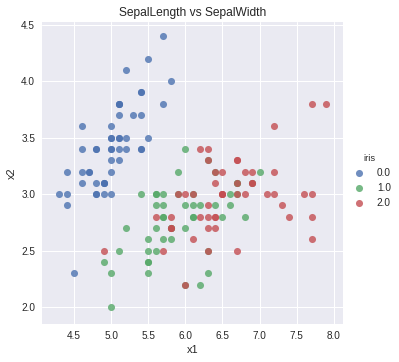

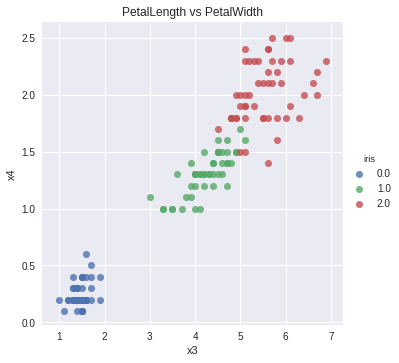

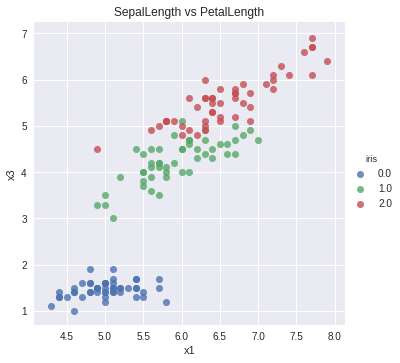

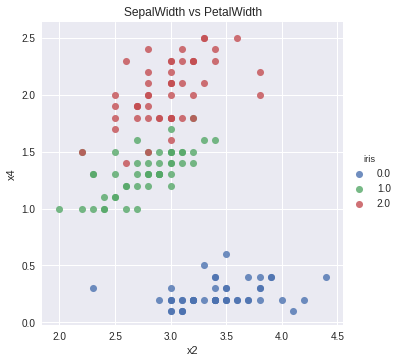

In [10]:
#visualisasi dataset Iris 

sns.lmplot('x1', 'x2',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('x3', 'x4',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('x1', 'x3',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('x2', 'x4',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

## Definisi Fungsi

In [0]:
# Menghitung result per neuron
def calcresult(weight, theta):
  result = weight[-1]
  for i in range(len(weight)-1):
    result += weight[i] * theta[i]
  return result

#fungsi aktivasi sigmoid 
def activation(x):
  return 1/(1+np.exp(-x))

#fungsi untuk menghitung delta
def delta(output):
	return output * (1.0 - output)

#fungsi untuk menghitung loss function (error) = 1/2(pred-actual)^2
def er(actual, predicted):
	error = 1/2*(predicted - actual)**2
	return error

#fungsi untuk membuat prediksi 
def pred(activation):    
  if activation >= 0.5:
    prediction = 1.0
  else: 
    prediction = 0.0
  return prediction  
    
# Menginisialisasi weight dari network
def inisialisasi(nInput, nHidden, nOut):
  net = list()
  hiddenlayer = [{'w':[random() for i in range(nInput + 1)]} for i in range(nHidden)]
  outputlayer = [{'w':[random() for i in range(nHidden + 1)]} for i in range(nOut)]
  net.append(hiddenlayer)
  net.append(outputlayer)
  return net

# Fungsi untuk feedforward dari input ke output
def feedforward(net, row):
	inputs = row
	for layer in net:
		nextinput = []
		for n in layer:
			result = calcresult(n['w'], inputs)
			n['out'] = activation(result)
			nextinput.append(n['out'])
		inputs = nextinput
	return inputs

# Fungsi untuk backpropagation 
def backprop(network, target):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
    #untuk hidden layer
		if i != len(network)-1:
			for j in range(len(layer)):
				e = 0.0
				for n in network[i + 1]:
					e += (n['w'][j] * n['delta'])
				errors.append(e)
		else:
      #untuk layer output, errornya langsung target-prediksi 
			for j in range(len(layer)):
				n = layer[j]
				errors.append(target[j] - n['out'])
		for j in range(len(layer)):
      #rumus deltanya menjadi target-prediksi * 1-prediksi*prediksi 
			n = layer[j]
			n['delta'] = errors[j] * delta(n['out'])
      
# Fungsi untuk update weight 
def updateweight(network, row, lr):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['out'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
        #rumus update weight w = w + lr *dtheta 
        # dtheta = delta * input  
				neuron['w'][j] += lr * neuron['delta'] * inputs[j]
      #untuk bias, tidak dikali dengan input dthetanya 
			neuron['w'][-1] += lr * neuron['delta']

#Fungsi untuk menghitung akurasi       
def accuracymetric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual))

In [0]:
# Fungsi untuk training & validasi netwrok

def trainnetwork(network, train, val, lr, epoch, n_out):
  #errr = []
  for ep in range(epoch):
    bener = 0
    sumerror = 0 
    exp=[]
    pred=[]
    for row in train:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #untuk bikin one hot encodingnya
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      backprop(network, expected)
      updateweight(network, row, lr)
      
      #membuat prediksi dari hasil aktivasi
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        bener +=1
    valnetwork(network, val, lr, n_out)  
    errr.append(sumerror/len(train))
    
    acc.append(bener/len(train))
  #print(errr)
  
  #print(acc)


In [0]:
  # Fungsi untuk validasi network
  def valnetwork(network, val, lr, n_out):
  #errr = []
    bener = 0
    sumerror = 0 
    
    for row in val:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #untuk bikin one hot encodingnya
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      
      #membuat prediksi dari hasil aktivasi
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        bener +=1
       
    errval.append(sumerror/len(train))
    
    accval.append(bener/len(train))

### Training dan Validation pada data Iris

In [0]:
#Split dataset 70% training, 30% validasi 
total=len(data)
lentrain=int(0.7*total)
lenval=int(0.3*total)

train = data[:lentrain]
val = data[lentrain:]

#### Learning Rate 0.1

In [69]:
# Training backprop algorithm
errr=[]
acc=[]
errval=[]
accval=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, val, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-3.3168211697285432, -6.423277047182116, 7.055899983955835, 6.1790096676514255, -4.570415955988261], 'out': 8.045882533110638e-11, 'delta': 2.5811467450219322e-15}, {'w': [-0.8538030836697192, -1.8170939526094507, 3.4677112831337045, 1.3761279714883068, -0.3624800756079563], 'out': 0.030382143409676456, 'delta': -0.0003670022884498419}]
[{'w': [-3.5856862667869978, -6.249877961716138, 3.0644233241864183], 'out': 0.9465733427597252, 'delta': 0.002199990826572295}, {'w': [-6.1371646244683715, 6.393512283792731, -3.0023802702706135], 'out': 0.056886334630371564, 'delta': -0.002476145477709082}, {'w': [6.6679236447495445, 0.06482234201698475, -3.857249764578205], 'out': 0.02072888650548213, 'delta': -0.0004198726350078491}]


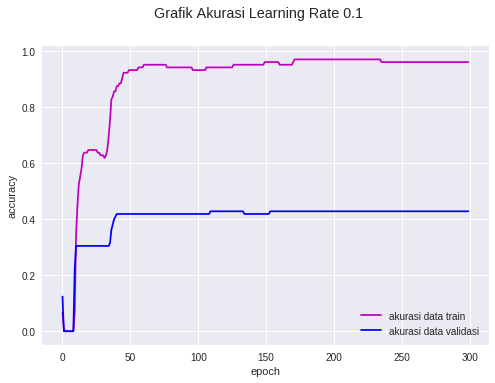

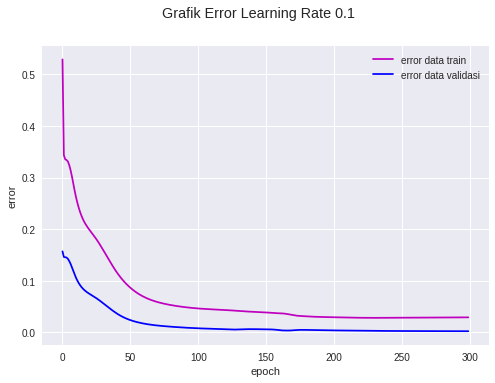

In [70]:
  #grafik akurasi 
  x=plt.figure()
  plt.suptitle('Grafik Akurasi Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(acc,'-m')
  plt.plot(accval,'-b')
  
  plt.gca().legend(('akurasi data train','akurasi data validasi'))
  y=plt.figure()
  
  #grafik error 
  y.suptitle('Grafik Error Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errr,'-m') 
  plt.plot(errval,'-b')
   
  plt.gca().legend(('error data train','error data validasi'))
  

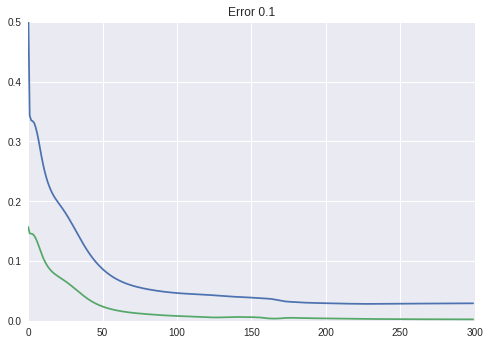

In [58]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error 0.1')
axzoom.plot(errr)
axzoom.plot(errval)

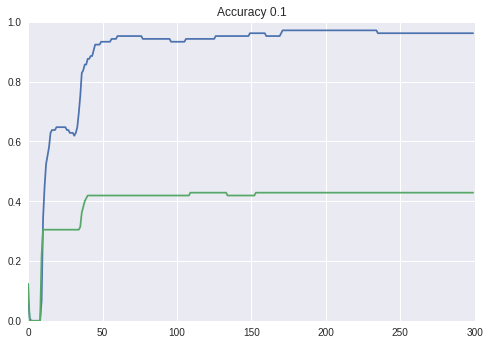

In [59]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy 0.1')
axzoom.plot(acc)
axzoom.plot(accval)

#### Learning Rate 0.8

In [60]:
# Training backprop algorithm
errval=[]
accval=[]
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, val, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-20.361385046507845, -12.63484999823679, 26.45476688446126, 32.03673997579003, -14.891799992455011], 'out': 1.6945800713353364e-40, 'delta': -3.134762734929712e-48}, {'w': [-0.7970054803785658, -2.2639764146758647, 4.298280414120966, 1.8344067686552215, -0.4027584600360655], 'out': 0.04485867564117292, 'delta': -5.1399267281863384e-05}]
[{'w': [-2.85702188359272, -8.746971283271206, 4.255571924050522], 'out': 0.9794311545913048, 'delta': 0.00025176229211415767}, {'w': [-5.174653390999045, 6.538634447295902, -4.59037924869254], 'out': 0.013425740954402543, 'delta': -0.00012209770871326374}, {'w': [5.187617959815089, 2.491625047606761, -4.446905708633834], 'out': 0.012930715468705003, 'delta': -0.00014303910085557871}]


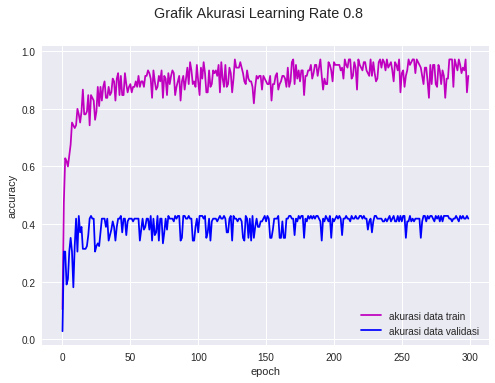

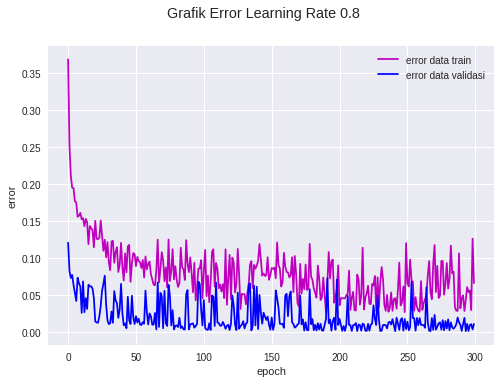

In [61]:
  #grafik akurasi 
  x=plt.figure()
  plt.suptitle('Grafik Akurasi Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(acc,'-m')
  plt.plot(accval,'-b')
 
  plt.gca().legend(('akurasi data train','akurasi data validasi'))
  y=plt.figure()
  
  #grafik error 
  y.suptitle('Grafik Error Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errr,'-m')
  plt.plot(errval,'-b')
    
  plt.gca().legend(('error data train','error data validasi'))
  

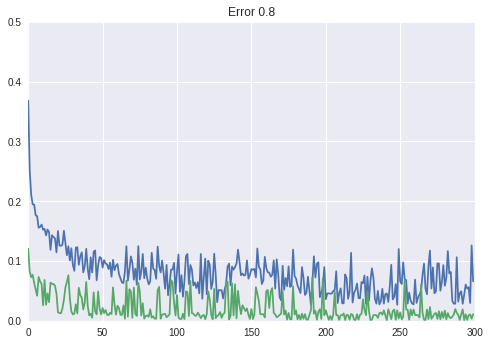

In [62]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error 0.8')
axzoom.plot(errr)
axzoom.plot(errval)

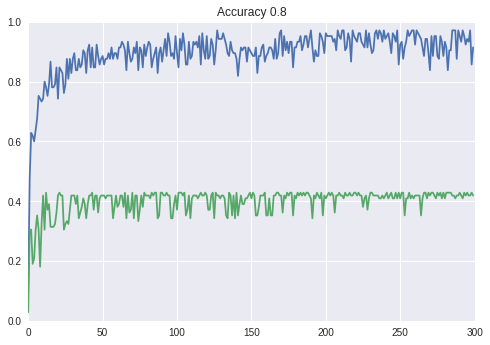

In [63]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy 0.8')
axzoom.plot(acc)
axzoom.plot(accval)

### Dengan jumlah hidden neuron lain

In [65]:
# Training backprop algorithm
errr=[]
acc=[]
errval=[]
accval=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 3, n_outputs)
trainnetwork(network, dataset, val, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-0.399484125597671, -1.8895931960995258, 0.9453543686504838, 3.6219808008721097, -0.9560514772623873], 'out': 0.00829116160487603, 'delta': -0.00014923138543309933}, {'w': [0.6193831076314458, 0.8138432641705362, 0.8382559030798403, 0.08781457776976793, 0.15248068707118406], 'out': 0.9973422689142551, 'delta': 2.773996099745459e-05}, {'w': [0.5832728181611743, 0.4757279415564771, 1.009592491115053, 0.4831934054943661, 0.5498467391192], 'out': 0.9967510751753607, 'delta': 6.47364569067233e-06}]
[{'w': [-9.781879499359105, 0.962493241443013, 0.6761898416289291, 0.5495997965914389], 'out': 0.8911386330140474, 'delta': 0.009411219444753692}, {'w': [0.4212699654434899, -0.4175465730488776, 0.030278706991788765, -0.6125179753114044], 'out': 0.26987011195241734, 'delta': -0.05397226962264434}, {'w': [9.745753703785079, -2.72683951359916, -2.4878055751790873, -2.7453966142085], 'out': 0.0003842210655328599, 'delta': -1.2641957049397915e-07}]


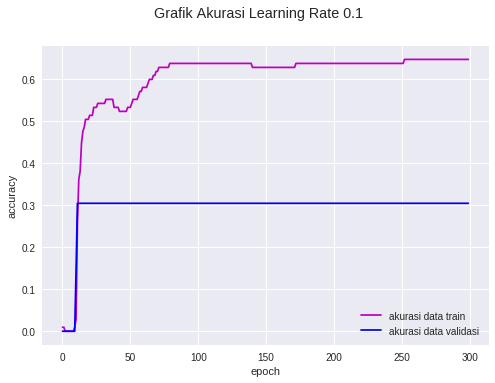

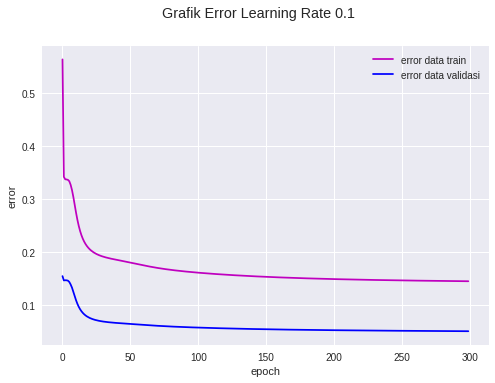

In [66]:
  #grafik akurasi 
  x=plt.figure()
  plt.suptitle('Grafik Akurasi Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(acc,'-m')
  plt.plot(accval,'-b')
 
  plt.gca().legend(('akurasi data train','akurasi data validasi'))
  y=plt.figure()
  
  #grafik error 
  y.suptitle('Grafik Error Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errr,'-m')
  plt.plot(errval,'-b')
    
  plt.gca().legend(('error data train','error data validasi'))
  

In [67]:
#dengan initial weight lain
# Training backprop algorithm
errr=[]
acc=[]
errval=[]
accval=[]
seed(800)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 8, n_outputs)
trainnetwork(network, dataset, val, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [0.6922409002713269, 0.963482592596948, 0.054098588710402115, 0.4538063251237957, 0.5151408812295832], 'out': 0.9976540238394788, 'delta': 1.5643148132107857e-06}, {'w': [-3.488187603742442, -6.744127240055904, 7.304208174356412, 6.405521561167336, -4.137577525117597], 'out': 4.0537757218588727e-11, 'delta': 1.6444391103158444e-15}, {'w': [0.5645402668682029, 0.8508146956540572, 0.3466415275912305, 0.17267226941721947, 0.30703052644457757], 'out': 0.9950665505654144, 'delta': 3.2664792151751898e-06}, {'w': [0.9996095373818017, 0.06115345417890065, 0.17618626208138083, 0.5651370896994734, 0.7419169190766468], 'out': 0.9969189408612632, 'delta': 2.870121161693688e-06}, {'w': [-0.6984305564164791, -1.89648904753079, 3.0312058797449803, 1.9569014792666737, -0.1322770607632536], 'out': 0.04271703310390695, 'delta': -0.000309780884959332}, {'w': [0.688321548085898, 0.11770381526193466, 0.5791331471738326, 0.5275607146479865, 0.6098789547994147], 'out': 0.9925286932255369, 'delta': 5.1

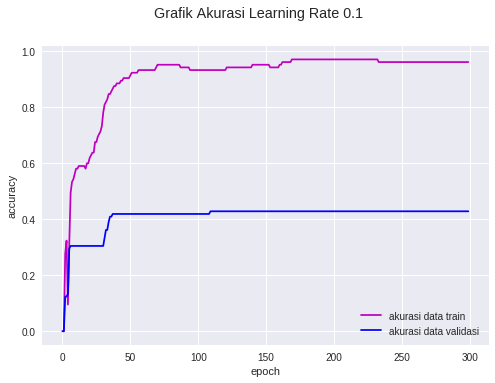

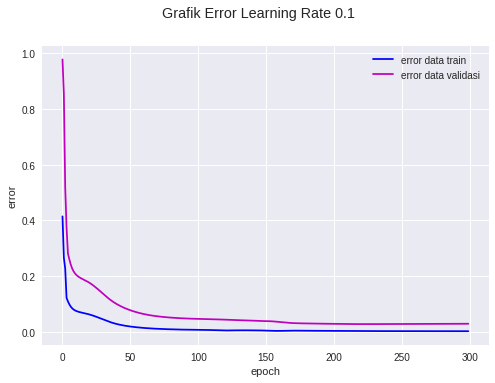

In [68]:
  #grafik akurasi 
  x=plt.figure()
  plt.suptitle('Grafik Akurasi Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(acc,'-m')
  plt.plot(accval,'-b')
  plt.gca().legend(('akurasi data train','akurasi data validasi'))
  y=plt.figure()
  
  #grafik error 
  y.suptitle('Grafik Error Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errval,'-b')
  plt.plot(errr,'-m')  
  plt.gca().legend(('error data train','error data validasi'))
  